# Original Data

In [1]:
# import required libraries
# import numpy as np
# import pandas as pd
# from sklearn import preprocessing

# read original csv file into dataframe
# df = pd.read_csv("data/speed_dating_raw.csv", encoding='latin-1')

# display dataframe
# df

# Group Created Data

In [3]:
import pandas as pd
import numpy as np

cols = ['match', 'exphappy', 'samerace', 'hobby_diff_phys', 'hobby_diff_out', 'hobby_diff_in', 'same_goal', 'attr_diff', 'sinc_diff', 'intel_diff', 'fun_diff', 'amb_diff', 'income_diff', 'age_diff', 'same_career', 'confidence', 'imprace', 'date_freq', 'out_freq']
raw_df = pd.read_csv("data/speed_dating_raw.csv", encoding='latin-1')
df = pd.DataFrame(columns=cols)

hobbies = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']

hobbies_phys = ['sports', 'exercise', 'hiking', 'yoga']
hobbies_out = ['dining', 'museums', 'concerts', 'clubbing', 'theater', 'movies', 'shopping']
hobbies_in = ['tvsports', 'art', 'gaming', 'reading', 'tv', 'music']

atts = ['attr', 'sinc', 'intel', 'fun', 'amb']
lookingfor = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1']
selfrate_a = ['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']
selfrate_b = ['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']

def sum_diff(attrs,p_1,p_2):
    hobby_diff = 0
    for h in attrs:
        hobby_diff += abs(p_1[h] - p_2[h])
    return hobby_diff

def att_diff(p_1, p_2):
    all_diff = {}
    for i in range(5):
        diff = 0
        selfrate_a1 = p_1[selfrate_a[i]]
        selfrate_b1 = p_1[selfrate_b[i]]
        selfrate_a2 = p_2[selfrate_a[i]]
        selfrate_b2 = p_2[selfrate_b[i]]

        # if pd.isna(p_1[selfrate_a[i]]) and pd.isna(p_1[selfrate_b[i]]):
        #     selfrate_a1 = raw_df[selfrate_a[i]].mean()
        #     selfrate_b1 = raw_df[selfrate_b[i]].mean()
        if pd.isna(p_1[selfrate_a[i]]):
            selfrate_a1 = p_1[selfrate_b[i]]
        elif pd.isna(p_1[selfrate_b[i]]):
            selfrate_b1 = p_1[selfrate_a[i]]
        # if pd.isna(p_2[selfrate_a[i]]) and pd.isna(p_2[selfrate_b[i]]):
        #     selfrate_a2 = raw_df[selfrate_a[i]].mean()
        #     selfrate_b2 = raw_df[selfrate_b[i]].mean()
        if pd.isna(p_2[selfrate_a[i]]):
            selfrate_a2 = p_2[selfrate_b[i]]
        elif pd.isna(p_2[selfrate_b[i]]):
            selfrate_b2 = p_2[selfrate_a[i]]

        want_1 = p_1[lookingfor[i]]
        want_2 = p_2[lookingfor[i]]
        selfrate_1 = (selfrate_a1 + selfrate_b1) / 2
        selfrate_2 = (selfrate_a2 + selfrate_b2) / 2
        diff += abs(selfrate_1 - want_2)
        diff += abs(selfrate_2 - want_1)
        if pd.isna(p_1[lookingfor[i]]) and pd.isna(p_2[lookingfor[i]]): print('W')
        all_diff[atts[i]] = diff
    return all_diff

def plain_diff(key, p_1, p_2):
    item_1 = p_1[key]
    item_2 = p_2[key]
    if isinstance(item_1,str):
        item_1 = float(item_1.replace(',',''))
    if isinstance(item_2,str):
        item_2 = float(item_2.replace(',',''))
    if pd.isna(p_1[key]) or pd.isna(p_2[key]):
        return np.nan
    return abs(item_1 - item_2)

def dated(iid, pid):
    return len(raw_df.loc[(raw_df['iid'] == iid) & (raw_df['pid'] == pid)]) != 0

def create_df():
    for iid in range(1,len(raw_df['iid'].unique())+1):
        for pid in raw_df.loc[raw_df['iid'] == iid]['pid'].unique():
            if dated(iid,pid):
                date = raw_df.loc[(raw_df['iid'] == iid) & (raw_df['pid'] == pid)].to_dict('records')[0]
                p_1 = raw_df.loc[raw_df['iid'] == iid].to_dict('records')[0]
                p_2 = raw_df.loc[raw_df['iid'] == pid].to_dict('records')[0]
                att_diffs = att_diff(p_1, p_2)
                # print(date['wave'],att_diffs)

                new_row = {
                    'match': date['match'],
                    'exphappy': date['exphappy'],
                    'samerace': date['samerace'],
                    'hobby_diff_phys': sum_diff(hobbies_phys,p_1,p_2),
                    'hobby_diff_out': sum_diff(hobbies_out, p_1, p_2),
                    'hobby_diff_in': sum_diff(hobbies_in, p_1, p_2),
                    'same_goal': int(p_1['goal'] == p_2['goal']),
                    'attr_diff': att_diffs['attr'],
                    'sinc_diff': att_diffs['sinc'],
                    'intel_diff': att_diffs['intel'],
                    'fun_diff': att_diffs['fun'],
                    'amb_diff': att_diffs['amb'],
                    'income_diff': plain_diff('income', p_1, p_2),
                    'age_diff': plain_diff('age', p_1, p_2),
                    'same_career': int(p_1['career_c'] == p_2['career_c']),
                    'confidence': ((((int(p_1['expnum']) / 20) + (int(p_2['expnum']) / 20)) / 2) if not (pd.isna(p_1['expnum']) or pd.isna(p_2['expnum'])) else p_1['expnum']),
                    'imprace': (((p_1['imprace'] + p_2['imprace']) / 2) if not (pd.isna(p_1['imprace']) or pd.isna(p_2['imprace'])) else p_1['imprace']),
                    'date_freq': p_1['date'],
                    'out_freq': p_1['go_out']
                }
                # print(new_row)
                df.loc[len(df)] = new_row
    return df

df = create_df()
df

,match,exphappy,samerace,hobby_diff_phys,hobby_diff_out,hobby_diff_in,same_goal,attr_diff,sinc_diff,intel_diff,fun_diff,amb_diff,income_diff,age_diff,same_career,confidence,imprace,date_freq,out_freq
0,0,3.0,0,7.0,21.0,24.0,0,36.0,23.0,24.0,20.0,17.0,NaN,6.0,0,0.125,4.5,7.0,1.0
1,0,3.0,0,7.0,19.0,15.0,0,60.0,19.0,18.0,38.0,13.0,40250.0,1.0,0,0.550,1.5,7.0,1.0
2,1,3.0,1,9.0,18.0,18.0,1,24.0,23.0,23.0,17.0,19.0,NaN,1.0,0,0.150,2.5,7.0,1.0
3,1,3.0,0,6.0,14.0,16.0,1,30.0,14.0,18.0,38.0,8.0,12907.0,2.0,0,0.425,1.5,7.0,1.0
4,1,3.0,0,2.0,28.0,20.0,0,32.0,15.0,23.0,10.0,9.0,32705.0,3.0,0,0.275,2.5,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8341,0,3.0,0,21.0,21.0,13.0,1,40.0,15.5,34.0,28.5,15.0,NaN,1.0,0,NaN,3.5,6.0,3.0
8342,0,3.0,0,16.0,7.0,18.0,1,74.0,23.0,12.0,14.0,14.0,22752.0,3.0,0,NaN,3.5,6.0,3.0
8343,0,3.0,0,11.0,26.0,25.0,0,64.0,16.0,33.5,19.5,14.0,39275.0,2.0,0,NaN,5.0,6.0,3.0
8344,0,3.0,0,11.0,16.0,22.0,0,37.0,26.5,29.5,18.5,12.0,NaN,5.0,0,NaN,3.0,6.0,3.0


In [4]:
print("Successfully created transformed csv datafile named 'speed_dating.csv' in the data folder")

Successfully created transformed csv datafile named 'speed_dating.csv' in the data folder


# 2.1 Data Quality Report

In [5]:
# code for data quality report

In [6]:
# print(df.columns)
categorical_list = ['samerace', 'same_goal', 'same_career', 'match']
continous_list = []
for i in df.columns:
    if i not in categorical_list:
        continous_list.append(i)

print("Categorical features: "+str(categorical_list))
print("Continous features: "+str(continous_list))


Categorical features: ['samerace', 'same_goal', 'same_career', 'match']
Continous features: ['exphappy', 'hobby_diff_phys', 'hobby_diff_out', 'hobby_diff_in', 'attr_diff', 'sinc_diff', 'intel_diff', 'fun_diff', 'amb_diff', 'income_diff', 'age_diff', 'confidence', 'imprace', 'date_freq', 'out_freq']


## Visualizations of Categorical Features

samerace


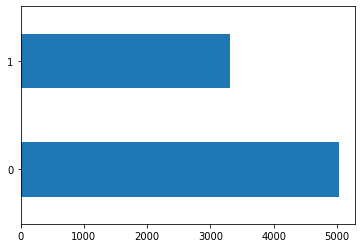

same_goal


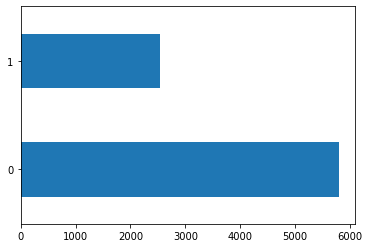

same_career


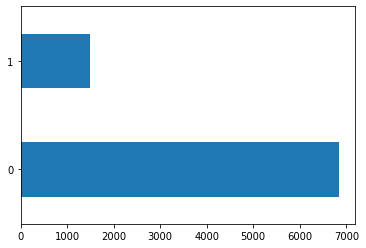

match


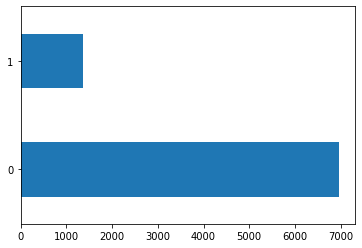

In [7]:

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# match,target: did they end up matching                                                                 - CAT
# samerace,are the two participants the same race                                                        - CAT
# same_goal,whether both people have the same goal in participating in speed dating                      - CAT
# same_career,whether both intended career paths fall into the same area                                 - CAT

#barplots for categorical features list
barplot_list = categorical_list

for i in barplot_list:
    print(i)
    plt.show(df[i].value_counts()[:5].plot.barh())

## Visualizations of Continuous Features

array([[<AxesSubplot:title={'center':'exphappy'}>,
        <AxesSubplot:title={'center':'hobby_diff_phys'}>,
        <AxesSubplot:title={'center':'hobby_diff_out'}>],
       [<AxesSubplot:title={'center':'hobby_diff_in'}>,
        <AxesSubplot:title={'center':'attr_diff'}>,
        <AxesSubplot:title={'center':'sinc_diff'}>],
       [<AxesSubplot:title={'center':'intel_diff'}>,
        <AxesSubplot:title={'center':'fun_diff'}>,
        <AxesSubplot:title={'center':'amb_diff'}>],
       [<AxesSubplot:title={'center':'income_diff'}>,
        <AxesSubplot:title={'center':'age_diff'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'imprace'}>,
        <AxesSubplot:title={'center':'date_freq'}>,
        <AxesSubplot:title={'center':'out_freq'}>]], dtype=object)

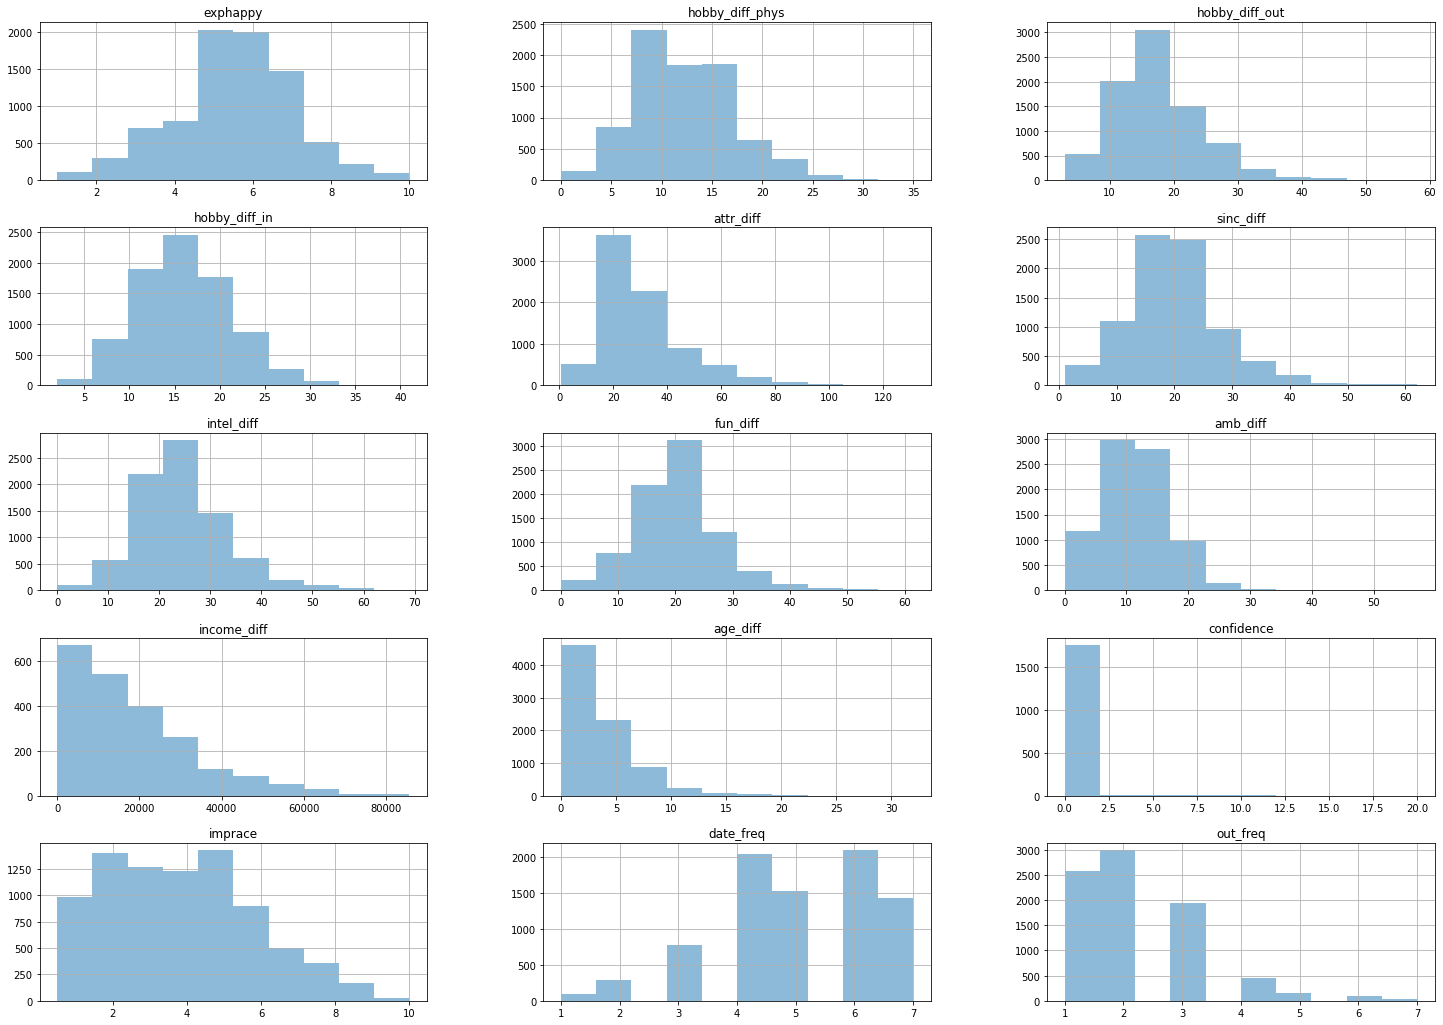

In [10]:
# histograms for continous features    
fig, ax = plt.subplots(5,3,figsize=(25,18)) # get a bigger figure
df_for_hist = df[continous_list]
df_for_hist.hist(bins=10, alpha=0.5, ax=ax) 

# 2.2 Missing Values

In [11]:
# drop the rows where at least one element is missing
df.dropna()

# drop the rows where all elements are missing
# df.dropna(how='all') 

# mean imputation
mean = df.mean()
df.fillna(value=mean, inplace=True)

# display dataframe
# df.head()
display(df)

,match,exphappy,samerace,hobby_diff_phys,hobby_diff_out,hobby_diff_in,same_goal,attr_diff,sinc_diff,intel_diff,fun_diff,amb_diff,income_diff,age_diff,same_career,confidence,imprace,date_freq,out_freq
0,0,3.0,0,7.0,21.0,24.0,0,36.0,23.0,24.0,20.0,17.0,18447.397612,6.0,0,0.125000,4.5,7.0,1.0
1,0,3.0,0,7.0,19.0,15.0,0,60.0,19.0,18.0,38.0,13.0,40250.000000,1.0,0,0.550000,1.5,7.0,1.0
2,1,3.0,1,9.0,18.0,18.0,1,24.0,23.0,23.0,17.0,19.0,18447.397612,1.0,0,0.150000,2.5,7.0,1.0
3,1,3.0,0,6.0,14.0,16.0,1,30.0,14.0,18.0,38.0,8.0,12907.000000,2.0,0,0.425000,1.5,7.0,1.0
4,1,3.0,0,2.0,28.0,20.0,0,32.0,15.0,23.0,10.0,9.0,32705.000000,3.0,0,0.275000,2.5,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8341,0,3.0,0,21.0,21.0,13.0,1,40.0,15.5,34.0,28.5,15.0,18447.397612,1.0,0,0.386816,3.5,6.0,3.0
8342,0,3.0,0,16.0,7.0,18.0,1,74.0,23.0,12.0,14.0,14.0,22752.000000,3.0,0,0.386816,3.5,6.0,3.0
8343,0,3.0,0,11.0,26.0,25.0,0,64.0,16.0,33.5,19.5,14.0,39275.000000,2.0,0,0.386816,5.0,6.0,3.0
8344,0,3.0,0,11.0,16.0,22.0,0,37.0,26.5,29.5,18.5,12.0,18447.397612,5.0,0,0.386816,3.0,6.0,3.0


# Outliers

In [12]:
# Tukey's Range Test aka IQR Method
def drop_outliers_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    outliers = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    outliers_dropped = outliers.dropna().reset_index()
    return outliers_dropped

drop_outliers_IQR(df)

,index,match,exphappy,samerace,hobby_diff_phys,hobby_diff_out,hobby_diff_in,same_goal,attr_diff,sinc_diff,intel_diff,fun_diff,amb_diff,income_diff,age_diff,same_career,confidence,imprace,date_freq,out_freq
0,312,0.0,5.522135,0,12.007572,17.230948,15.945774,0,30.558997,20.004046,24.389565,20.240333,11.547716,18447.397612,1.000000,0.0,0.386816,3.789283,5.015396,2.161606
1,313,0.0,5.522135,0,12.007572,17.230948,15.945774,0,30.558997,20.004046,24.389565,20.240333,11.547716,18447.397612,4.000000,0.0,0.386816,3.789283,5.015396,2.161606
2,314,0.0,5.522135,0,12.007572,17.230948,15.945774,0,30.558997,20.004046,24.389565,20.240333,11.547716,18447.397612,3.000000,0.0,0.386816,3.789283,5.015396,2.161606
3,315,0.0,5.522135,1,12.007572,17.230948,15.945774,0,30.558997,20.004046,24.389565,20.240333,11.547716,18447.397612,2.000000,0.0,0.386816,3.789283,5.015396,2.161606
4,316,0.0,5.522135,1,12.007572,17.230948,15.945774,0,30.558997,20.004046,24.389565,20.240333,11.547716,18447.397612,2.000000,0.0,0.386816,3.789283,5.015396,2.161606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2734,8327,0.0,3.000000,0,21.000000,16.000000,16.000000,1,46.000000,24.500000,25.000000,30.000000,7.000000,18447.397612,3.662459,0.0,0.386816,1.500000,6.000000,3.000000
2735,8332,0.0,3.000000,0,16.000000,23.000000,10.000000,0,40.500000,22.000000,22.000000,30.000000,7.500000,18447.397612,3.000000,0.0,0.386816,1.500000,6.000000,3.000000
2736,8338,0.0,3.000000,0,8.000000,16.000000,14.000000,0,37.000000,28.000000,23.000000,30.500000,6.500000,18447.397612,0.000000,0.0,0.386816,2.500000,6.000000,3.000000
2737,8341,0.0,3.000000,0,21.000000,21.000000,13.000000,1,40.000000,15.500000,34.000000,28.500000,15.000000,18447.397612,1.000000,0.0,0.386816,3.500000,6.000000,3.000000


# 2.3 Robust Scaling

In [13]:
# import RobustScaler class
from sklearn.preprocessing import RobustScaler

# fit the data
transformer = RobustScaler().fit(df)

# scale the data
transformer.transform(df)

array([[ 0.        , -1.5       ,  0.        , ...,  0.33333333,
         1.        , -0.5       ],
       [ 0.        , -1.5       ,  0.        , ..., -0.66666667,
         1.        , -0.5       ],
       [ 1.        , -1.5       ,  1.        , ..., -0.33333333,
         1.        , -0.5       ],
       ...,
       [ 0.        , -1.5       ,  0.        , ...,  0.5       ,
         0.5       ,  0.5       ],
       [ 0.        , -1.5       ,  0.        , ..., -0.16666667,
         0.5       ,  0.5       ],
       [ 0.        , -1.5       ,  0.        , ..., -0.66666667,
         0.5       ,  0.5       ]])

# Range Normalization

In [14]:
# import required libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
# import MinMaxScaler class
from sklearn.preprocessing import MinMaxScaler

# establish feature range
scaler = MinMaxScaler(feature_range=(0,1))

# fit data
print(scaler.fit(df))

# perform normalization
print(scaler.transform(df))

# display dataframe
# df.head()
display(df)

MinMaxScaler()
[[0.         0.22222222 0.         ... 0.42105263 1.         0.        ]
 [0.         0.22222222 0.         ... 0.10526316 1.         0.        ]
 [1.         0.22222222 1.         ... 0.21052632 1.         0.        ]
 ...
 [0.         0.22222222 0.         ... 0.47368421 0.83333333 0.33333333]
 [0.         0.22222222 0.         ... 0.26315789 0.83333333 0.33333333]
 [0.         0.22222222 0.         ... 0.10526316 0.83333333 0.33333333]]


,match,exphappy,samerace,hobby_diff_phys,hobby_diff_out,hobby_diff_in,same_goal,attr_diff,sinc_diff,intel_diff,fun_diff,amb_diff,income_diff,age_diff,same_career,confidence,imprace,date_freq,out_freq
0,0,3.0,0,7.0,21.0,24.0,0,36.0,23.0,24.0,20.0,17.0,18447.397612,6.0,0,0.125000,4.5,7.0,1.0
1,0,3.0,0,7.0,19.0,15.0,0,60.0,19.0,18.0,38.0,13.0,40250.000000,1.0,0,0.550000,1.5,7.0,1.0
2,1,3.0,1,9.0,18.0,18.0,1,24.0,23.0,23.0,17.0,19.0,18447.397612,1.0,0,0.150000,2.5,7.0,1.0
3,1,3.0,0,6.0,14.0,16.0,1,30.0,14.0,18.0,38.0,8.0,12907.000000,2.0,0,0.425000,1.5,7.0,1.0
4,1,3.0,0,2.0,28.0,20.0,0,32.0,15.0,23.0,10.0,9.0,32705.000000,3.0,0,0.275000,2.5,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8341,0,3.0,0,21.0,21.0,13.0,1,40.0,15.5,34.0,28.5,15.0,18447.397612,1.0,0,0.386816,3.5,6.0,3.0
8342,0,3.0,0,16.0,7.0,18.0,1,74.0,23.0,12.0,14.0,14.0,22752.000000,3.0,0,0.386816,3.5,6.0,3.0
8343,0,3.0,0,11.0,26.0,25.0,0,64.0,16.0,33.5,19.5,14.0,39275.000000,2.0,0,0.386816,5.0,6.0,3.0
8344,0,3.0,0,11.0,16.0,22.0,0,37.0,26.5,29.5,18.5,12.0,18447.397612,5.0,0,0.386816,3.0,6.0,3.0


# 2.4 Transformations

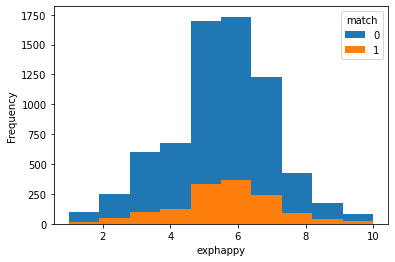

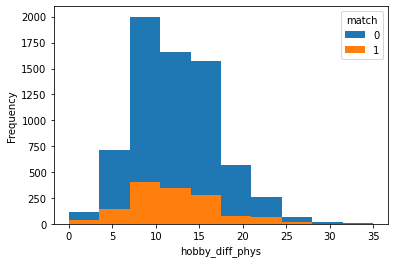

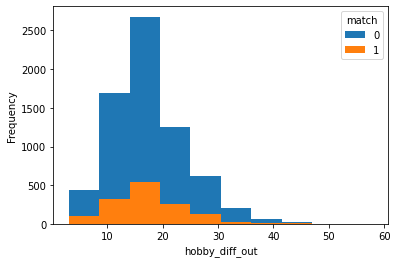

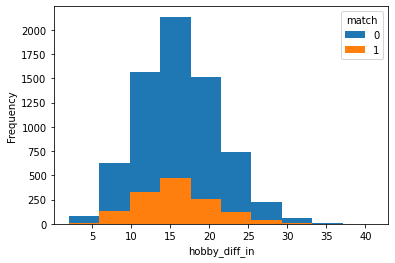

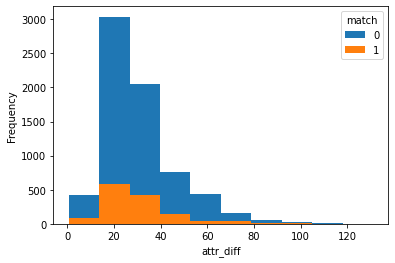

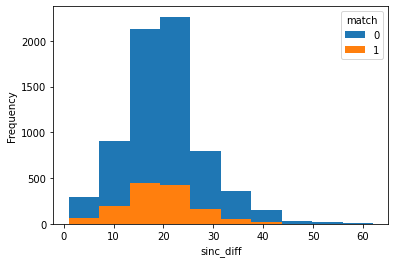

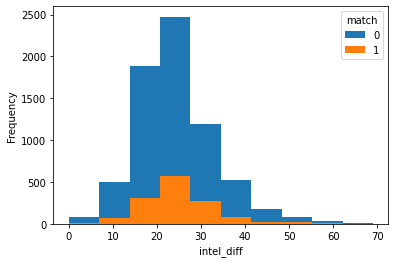

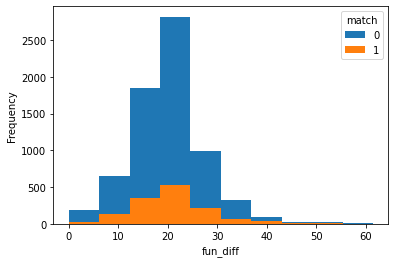

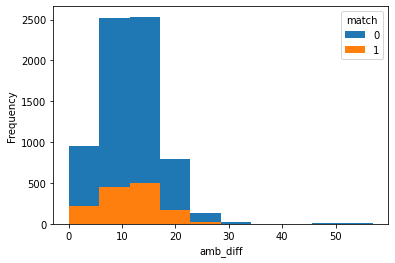

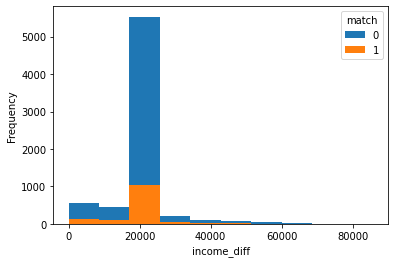

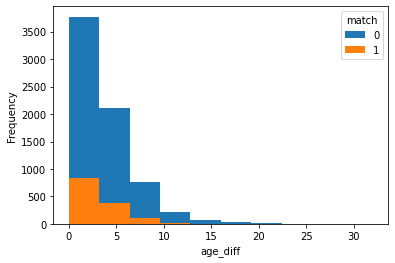

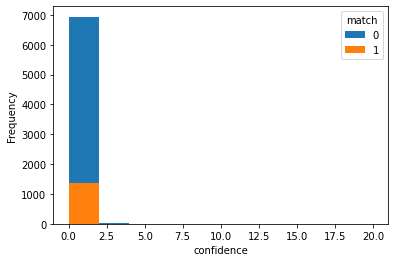

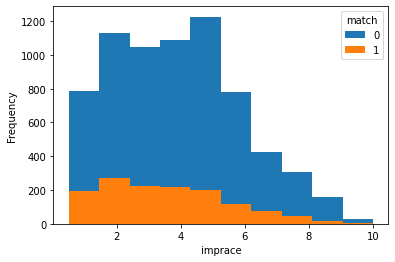

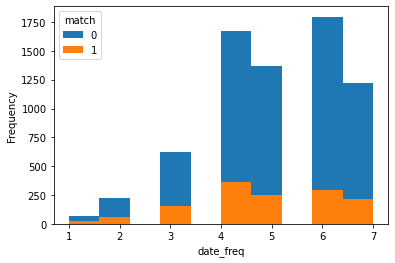

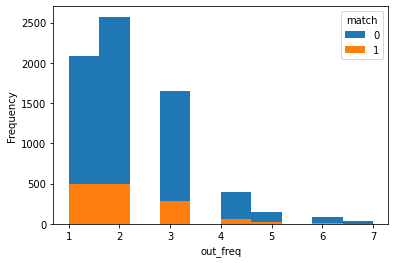

In [16]:
for i in continous_list:
    df.pivot(columns='match', values=i).plot.hist()
    plt.xlabel(i)
    plt.show()